In [26]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the input images
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#%matplotlib inline

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

# Create the original model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])



model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 22, 22, 96)        34944     
                                                                 
 activation_40 (Activation)  (None, 22, 22, 96)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 11, 11, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_35 (Bat  (None, 11, 11, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 256)       614656    
                                                                 
 activation_41 (Activation)  (None, 11, 11, 256)      

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
# Compile the model using each optimizer
adam_optimizer = keras.optimizers.Adam(learning_rate=0.000005)
rmsprop_optimizer = keras.optimizers.RMSprop(learning_rate=0.000005)
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.000005, momentum=0.6)

optimizers = [adam_optimizer, rmsprop_optimizer, sgd_optimizer]
cb = EarlyStopping(monitor='val_accuracy', min_delta=0.05, patience=5, restore_best_weights=True)
#model_l2.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

# Train the model and store the history for each optimizer
histories = []
for optimizer in optimizers:
    print(f"Training model with optimizer: {optimizer}")
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test), callbacks=[cb])
    histories.append(history)

Training model with optimizer: <keras.optimizers.adam.Adam object at 0x7d300ce22aa0>
Epoch 1/30
391/391 [==============================] - 25s 46ms/step - loss: 116.6018 - accuracy: 0.2245 - val_loss: 115.4341 - val_accuracy: 0.1736
Epoch 2/30
391/391 [==============================] - 17s 44ms/step - loss: 113.7916 - accuracy: 0.3172 - val_loss: 111.9921 - val_accuracy: 0.4351
Epoch 3/30
391/391 [==============================] - 17s 43ms/step - loss: 111.1563 - accuracy: 0.3605 - val_loss: 109.4200 - val_accuracy: 0.4701
Epoch 4/30
391/391 [==============================] - 17s 43ms/step - loss: 108.5524 - accuracy: 0.3909 - val_loss: 106.8929 - val_accuracy: 0.4865
Epoch 5/30
391/391 [==============================] - 17s 43ms/step - loss: 105.9921 - accuracy: 0.4192 - val_loss: 104.4020 - val_accuracy: 0.5036
Epoch 6/30
391/391 [==============================] - 16s 42ms/step - loss: 103.4597 - accuracy: 0.4421 - val_loss: 101.9309 - val_accuracy: 0.5144
Epoch 7/30
391/391 [=======

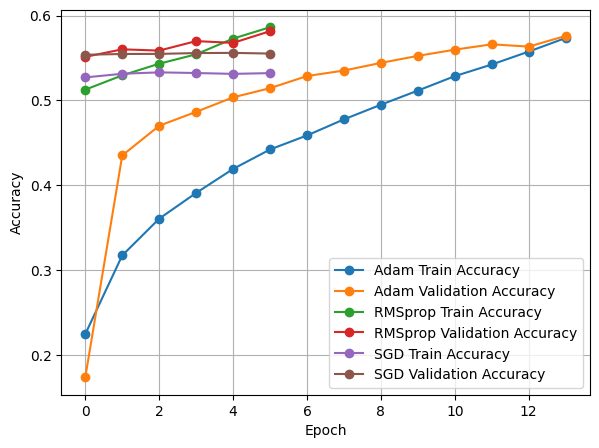

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for i, history in enumerate(histories):
    optimizer_name = optimizers[i].__class__.__name__
    plt.plot(history.history['accuracy'], 'o-', label=f'{optimizer_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], 'o-', label=f'{optimizer_name} Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')


plt.show()